# Feature Loading

## For explainations of the features,
## refer to : https://github.com/ricoms/video_image_features

### A. The downloaded "z0N" files are first unzipped using the 7zip program in Windows.

### B.  Scan the features into the pandas frame

In [2]:
# Load the ColorHistograms of 3 images
import os
import pandas as pd
import re
import numpy as np

/home/wsun3/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
# define all the functions in this section 

def vname2ID(vnames):
    """Parse video digital id from its name
    vnames: a list contains file names"""
    vid = [ os.path.splitext(vn)[0][5:] for vn in vnames]
    return vid

def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

def read_ColorHistogram(fname):
    """Scan Color Histogram from file
    Input file contains RGB histogram,
    Return a matrix of (3,256)"""
    RGB_Hist = np.zeros((3,256))
    with open(fname) as f:
        i_l = 0 # line index
        for line in f:
            pairs = line.split()
            hist_dict = {int(p.split(':')[0]):float(p.split(':')[1]) for p in pairs}
            for idx in hist_dict.keys():
                RGB_Hist[i_l,idx] = hist_dict[idx]
            i_l += 1
    return RGB_Hist

def read_HOG(fname):
    """Scan HOG (Histogram of Oriented Gradients) from file
    ****
    This is questionable, since its a hsitogram, calculated on 32 x 32 windows,
    why is the size is different for frames in the same video"""
    pass

def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df

    

In [7]:
Feat_path = '/home/wsun3/multimediaeval18/features/'
image_feat_names = ['ColorHistogram','HOG','InceptionV3','LBP','ORB']
video_feat_names = ['C3D','HMP']

In [8]:
# Load video related features first
# it helps with the organization of the video names
vnames = os.listdir(Feat_path+'C3D')
vid = vname2ID(vnames) # video id


In [5]:
Features = pd.DataFrame({'ID': vid,
                   'C3D': [read_C3D(Feat_path+'C3D'+'/video'+item+'.txt') for item in vid],
                   'HMP':[read_HMP(Feat_path+'HMP'+'/video'+item+'.txt') for item in vid],
                    'ColorHistogram0':[read_ColorHistogram(Feat_path+'ColorHistogram'+'/video'+item+'-0.txt') for item in vid],
                    'ColorHistogram56':[read_ColorHistogram(Feat_path+'ColorHistogram'+'/video'+item+'-56.txt') for item in vid],
                    'ColorHistogram112':[read_ColorHistogram(Feat_path+'ColorHistogram'+'/video'+item+'-112.txt') for item in vid]
                        })


KeyboardInterrupt: 

In [9]:
# load the ground truth values
label_path = '/home/wsun3/multimediaeval18/ground-truth/'
labels=pd.read_csv(label_path+'ground-truth_dev-set.csv')

In [10]:
# load the captions
cap_path = '/media/win/Users/ecelab-adm/Desktop/DataSet_me18me/me18me-devset/dev-set/dev-set_video-captions.txt'
df_cap=read_caps(cap_path)
labels['caption'] = df_cap['caption']

In [11]:
# checkout the stats of the true memoribility
labels.agg(['min','max','mean','median'])[['video','short-term_memorability','long-term_memorability','caption']]

,video,short-term_memorability,long-term_memorability,caption
min,video10.webm,0.388,0.000000,-black-old-people-portrait-worried-senior-lady...
max,video9999.webm,0.989,1.000000,zooming-in-on-man-paddling-white-water-kayak-s...
mean,NaN,0.859,0.778924,NaN
median,NaN,0.867,0.800000,NaN


In [12]:
# sort the labels in decreasing order by short term memorability
labels_sorted = labels.sort_values(axis=0,by='short-term_memorability',ascending=True)

In [13]:
labels_sorted.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,caption
1517,video27.webm,0.388,33,0.647,17,timelapse-of-snow-mountains
330,video1377.webm,0.432,34,0.636,11,snow-capped-mountain-at-dusk
4263,video5794.webm,0.443,31,0.750,12,grey-canyons-and-valleys
471,video1530.webm,0.463,34,0.417,12,grassy-field-with-flowers-and-trees
1426,video2593.webm,0.476,33,0.444,9,dark-sea-with-bright-sky


In [14]:
labels_sorted.tail()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,caption
1077,video2203.webm,0.986,35,0.800,10,astronaut-in-outer-space-against-the-backdrop-...
7546,video9496.webm,0.987,34,0.727,11,two-rehabilitated-seals-heading-down-beach-tow...
3458,video4903.webm,0.987,33,0.600,10,mather-and-daughter-enjoying-a-movie-on-tablet
884,video1981.webm,0.987,34,0.769,13,happy-stylish-elegant-young-couple-welcoming-i...
6214,video798.webm,0.989,34,1.000,10,camera-moves-in-on-beared-man-with-shovel-taki...


In [15]:
# sort the labels in decreasing order by long term memorability
labels_sorted = labels.sort_values(axis=0,by='long-term_memorability',ascending=True)

In [16]:
labels_sorted.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,caption
1658,video2861.webm,0.872,36,0.000,10,barista-makes-latte-cappuccino-in-coffee-machine
6150,video7903.webm,0.751,34,0.182,11,lone-tree-in-field
6763,video8605.webm,0.899,35,0.182,11,a-young-man-is-sitting-on-the-bench-and-lookin...
2043,video3280.webm,0.863,33,0.200,10,texas-leonabelle-turnbull-birding-center-flyin...
129,video114.webm,0.875,36,0.200,10,videoblocks-tree-roots-protrude-from-eroded-gr...


In [17]:
labels_sorted.tail()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,caption
4975,video6594.webm,0.890,33,1.0,11,black-woman-leaning-against-wall
440,video1496.webm,0.983,33,1.0,12,businesswoman-swinging-in-a-hammock-and-drinki...
4964,video6583.webm,0.910,40,1.0,10,elephant-in-golden-light
1944,video317.webm,0.892,33,1.0,13,moscow-russia-july-moscow-historical-festival-...
5598,video7285.webm,0.885,32,1.0,11,attractive-woman-with-a-cup-of-coffee-on-the-bed


In [18]:
# visualize the relationshipt between long-term and short-term memorability
import matplotlib.pyplot as plt

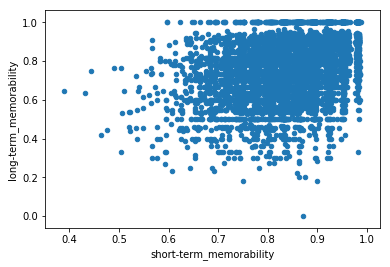

In [27]:
labels.plot.scatter('short-term_memorability','long-term_memorability')

## There is not much expected linear relationship between long and short term memorability